**Stock Market Data Analysis 🚀🚀🚀 🌑🌑🌑**


1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
5. What was the correlation between different stocks' daily returns?
6. How much value do we put at risk by investing in a particular stock?
7. How can we attempt to predict future stock behavior?

In [2]:
#import dataframe and visualization libraries 

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#read in stonks, timestamps, and division 

import pandas_datareader.data as web
from datetime import datetime
from __future__ import division

In [4]:
#list of stonks

moon = ['GME', 'TSLA', 'AMC', 'MSFT']

In [5]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)


In [6]:
for stonk in moon:
    globals()[stonk] = web.DataReader(stonk, 'yahoo',start,end)

In [27]:
TSLA.describe()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000,242.000000,232.000000,202.000000
mean,480.926749,456.212789,469.472033,469.786405,5.557187e+07,469.786405,40.485822,38.326696,31.094410
std,227.435285,217.940328,223.370043,223.277056,3.056135e+07,223.277056,62.574705,56.848344,41.930133
min,146.145996,134.757996,140.199997,137.343994,1.515770e+07,137.343994,4.018000,4.097000,4.352800
25%,302.305008,283.599014,291.919998,296.149002,3.319890e+07,296.149002,4.683250,4.626125,4.838450
50%,437.760010,420.100006,430.130005,425.790009,4.777570e+07,425.790009,11.374000,11.846750,11.036900
75%,681.184998,651.360016,668.404999,664.839996,7.189165e+07,664.839996,27.387250,27.760750,47.055650
max,900.400024,871.599976,891.380005,883.090027,2.221262e+08,883.090027,227.103999,203.817500,149.352201


In [28]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-04-20 to 2021-04-16
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   High            251 non-null    float64
 1   Low             251 non-null    float64
 2   Open            251 non-null    float64
 3   Close           251 non-null    float64
 4   Volume          251 non-null    float64
 5   Adj Close       251 non-null    float64
 6   MA for 10 days  242 non-null    float64
 7   MA for 20 days  232 non-null    float64
 8   MA for 50 days  202 non-null    float64
dtypes: float64(9)
memory usage: 19.6 KB


<AxesSubplot:xlabel='Date'>

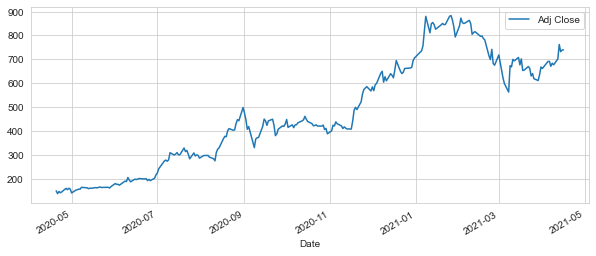

In [29]:
TSLA['Adj Close'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

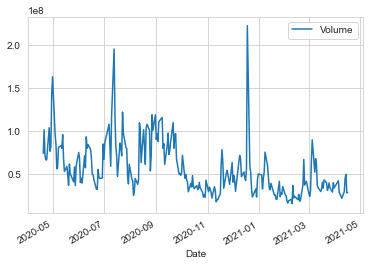

In [30]:
TSLA['Volume'].plot(legend = True)

In [31]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    TSLA[column_name] = TSLA['Adj Close'].rolling(ma).mean()

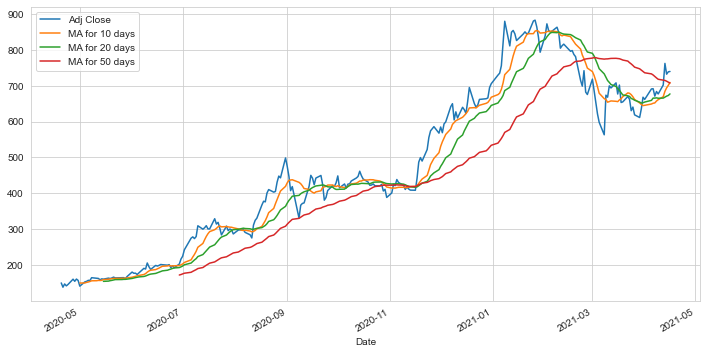

In [32]:
TSLA[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()